### 교통사고 유형별 사고건수, 사망자수, 중상자수 비율을 요약한 데이터 활용 아래 문제 풀기 

1. 사고유형 "차대차"인 사고유형별 사망비율을 막대 그래프로 시각화. 사망비율은 사망자수 / 사고건수로 계산하며, matplotlib폰트는 아래 폰트를 이용하여 맑은 고딕으로 설정

2. 사고유형대분류별로 사망자수가 가장 많은 사고 유형 출력. 그 결과는 ['횡단중','측면충돌','공작물충돌']이어야 함 

3. 사고유형별 중상비율을 계산하고 중상비율이 50%를 넘는 데이터만 중상비율.csv 로 저장

In [1]:
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
# 1. data load and visualize 
import pandas as pd 
df = pd.read_excel("accident_stat.xlsx")
df.head()

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16916\414642333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['사망비율'] = f_df['사망자수'] / f_df['사고건수']


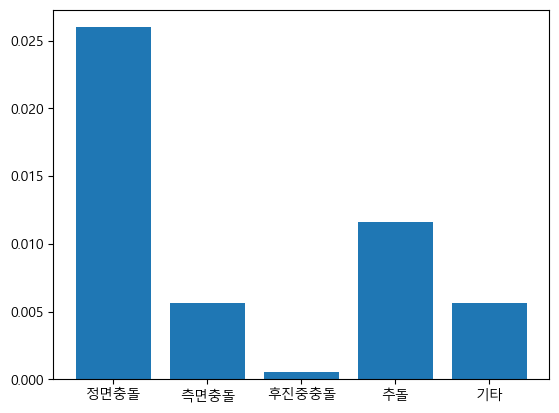

In [7]:
f_df = df.loc[df['사고유형대분류'] == '차대차']
f_df['사망비율'] = f_df['사망자수'] / f_df['사고건수']
plt.bar(range(len(f_df)),f_df['사망비율'])
plt.xticks(range(len(f_df)),f_df['사고유형'])
plt.show()

In [8]:
# 2 groupby를 이용 사망자수의 최댓값을 갖는 사고 유형 찾기 
df.loc[df.groupby('사고유형대분류')['사망자수'].idxmax(),'사고유형'].tolist()

['횡단중', '측면충돌', '공작물충돌']

In [ ]:
# 3 중상 비율을 계산하고 필터링하고 csv파일로 저장
df['중상비율'] = df['중상자수'] / df['사고건수']
df.loc[df['중상비율'] > 0.5].to_csv("중상비율.csv",index=False,encoding="cp949")